<div style="display: flex; align-items: center; justify-content: center; text-align: center;">
  <img src="https://coursereport-s3-production.global.ssl.fastly.net/uploads/school/logo/219/original/CT_LOGO_NEW.jpg" width="100" style="margin-right: 10px;">
  <div>
    <h1><b>🧪 Lab - Cell Phone Churning</b></h1>
  </div>
</div>

# PART 1: Data Cleaning

Before diving into the modeling process, it's crucial to ensure that your data is clean and ready for analysis.

- **Check null values:** Examine the dataset for any missing values. Addressing null values is essential to prevent issues during model training and evaluation.

- **Check dtypes:** Ensure that the data types of your features are appropriate. This step is important for avoiding potential discrepancies between the expected and actual data types.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('data/churn.csv')

In [3]:
df.head()

,account_length,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.dtypes

account_length      int64
vmail_message       int64
day_mins          float64
day_calls           int64
day_charge        float64
eve_mins          float64
eve_calls           int64
eve_charge        float64
night_mins        float64
night_calls         int64
night_charge      float64
intl_mins         float64
intl_calls          int64
intl_charge       float64
custserv_calls      int64
churn                bool
dtype: object

In [20]:
df.isna().sum()

account_length    0
vmail_message     0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
intl_mins         0
intl_calls        0
intl_charge       0
custserv_calls    0
churn             0
dtype: int64

In [5]:
df['churn'] = df['churn'].replace({False : 0, True : 1})

/tmp/ipykernel_21215/1293198433.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['churn'] = df['churn'].replace({False : 0, True : 1})


# PART 2: EDA

Exploring your data helps you gain insights and identify patterns or trends. Consider the following steps:

- **Visualize the data:** Utilize seaborn's `pairplot` to create a visual representation of relationships between different variables. This can offer a preliminary understanding of how features correlate with each other.
- Feel free to create other visualizations as well!

<Axes: >

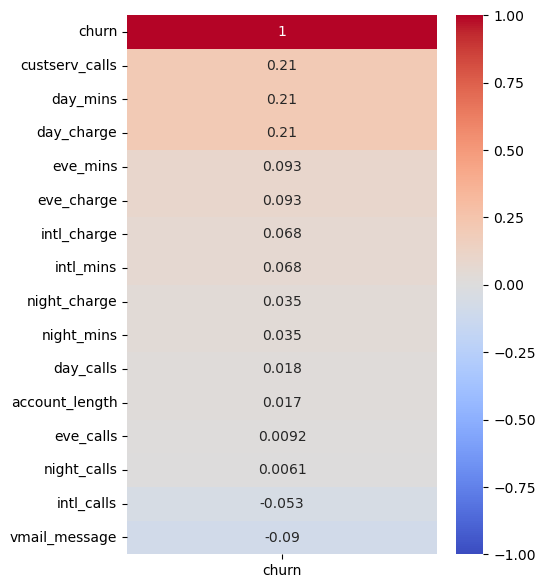

In [16]:
plt.figure(figsize= (5, 7))
sns.heatmap(df.corr()[['churn']].sort_values(by = 'churn', ascending = False), 
           vmin = -1, 
           vmax = 1, 
           annot = True, 
           cmap = 'coolwarm')

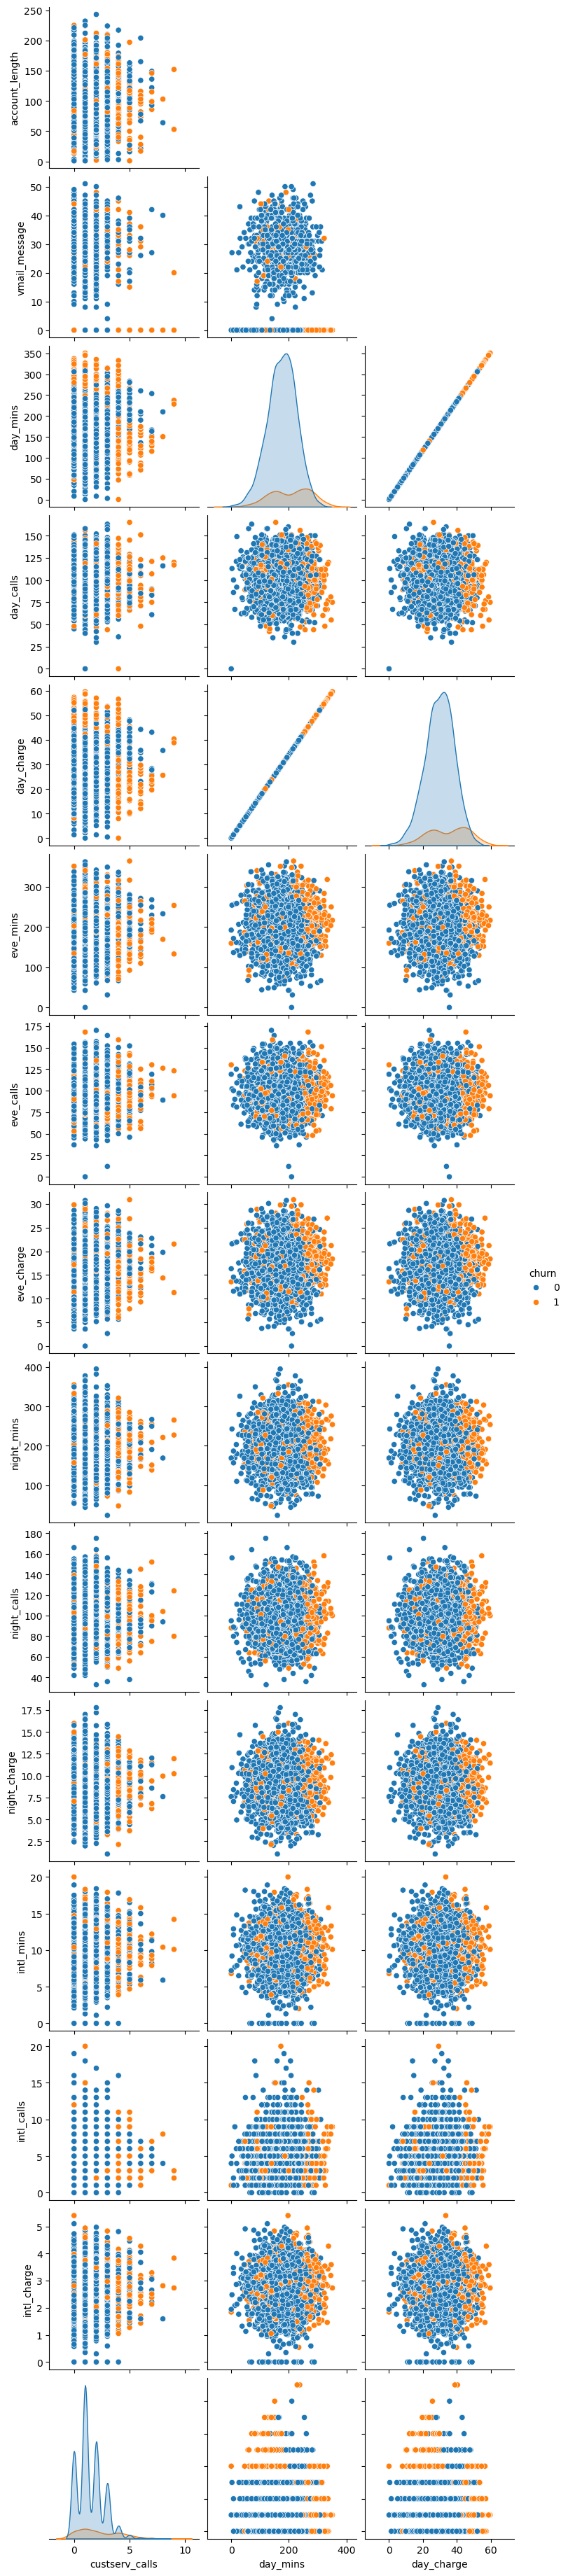

In [27]:
sns.pairplot(df, corner = True, hue = 'churn', 
            x_vars = ['custserv_calls','day_mins','day_charge'] )

<Axes: xlabel='churn', ylabel='count'>

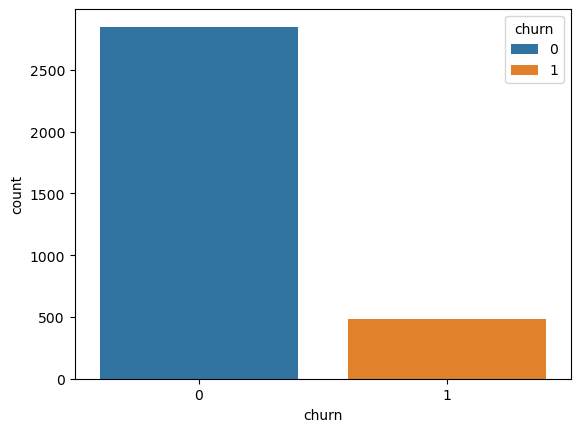

In [26]:
sns.countplot(df, x = 'churn', hue = 'churn')

<Axes: xlabel='day_mins', ylabel='churn'>

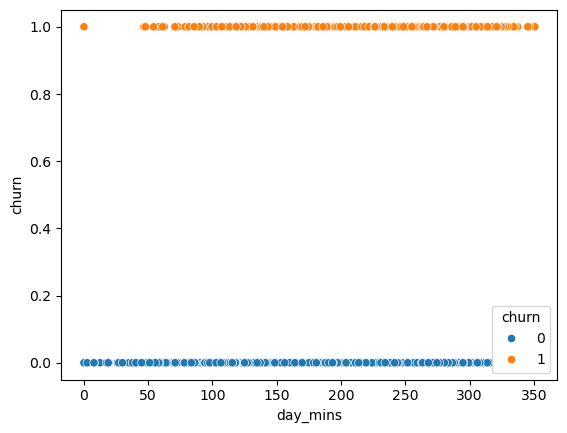

In [34]:
sns.scatterplot(df, x = 'day_mins', y = 'churn', hue ='churn')

<Axes: xlabel='day_charge', ylabel='churn'>

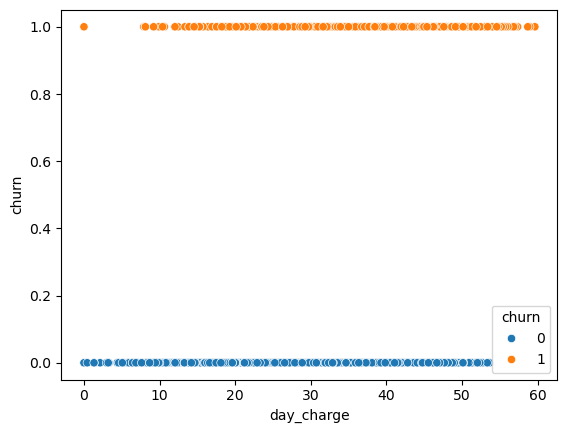

In [46]:
sns.scatterplot(df, x = 'day_charge', y = 'churn', hue ='churn')

<Axes: xlabel='custserv_calls', ylabel='eve_mins'>

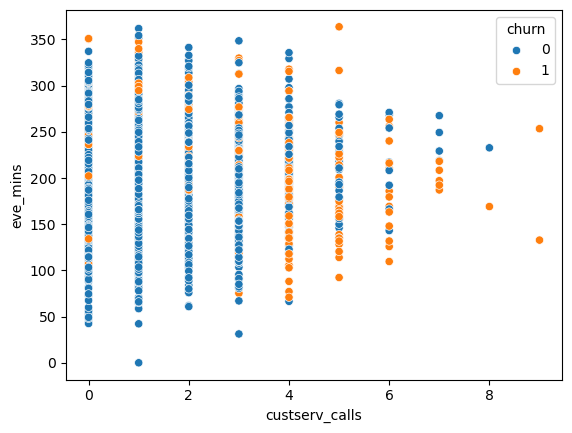

In [58]:
sns.scatterplot(df, x = 'custserv_calls', y = 'eve_mins', hue ='churn')

# PART 3: MODELING
Now that your data is clean and you've explored its characteristics, it's time to build and evaluate your models.

- **Establish baseline accuracy score:** Before training any models, establish a baseline accuracy score. This provides a benchmark for evaluating the performance of your models.

- **Train-test-split with `random_state = 42`:** Split your data into training and testing sets using `train_test_split` with a specified random state. This ensures reproducibility in your results.

- **Normalize your data with `StandardScaler`:** Standardize your features using `StandardScaler` to ensure that they are on a similar scale. This step is particularly important for algorithms sensitive to the scale of input features, such as K-Nearest Neighbors.

- **Evaluate K-Nearest Neighbors (KNN):**
  - Set \( k = 5 \) and calculate the training/testing accuracy scores. Explore whether the model performs better with other values of \( k \). <br>
<br>
- **Try Logistic Regression and RandomForestClassifier:**
  - Experiment with alternative models such as Logistic Regression and RandomForestClassifier. Compare their performance against the KNN model to identify the most suitable algorithm for your specific classification task.
<br>
  - For each model, include a confusion matrix to assess its performance in terms of true positives, true negatives, false positives, and false negatives.

In [6]:
# Baseline Model
df['churn'].value_counts(normalize= True)

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

In [21]:
X = df[['custserv_calls','day_mins','day_charge', 'eve_mins']]

y = df['churn']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

# 4. Scaling

In [23]:
sc = StandardScaler()

In [24]:
X_train_sc = sc.fit_transform(X_train)

In [25]:
X_test_sc = sc.transform(X_test)

# 5. knn

In [26]:
scores = []

for k in range(3, 32, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)

    scores.append({'k': k, 'train_score': train_score, 'test_score': test_score})

df_scores = pd.DataFrame(scores)

In [27]:
df_scores

,k,train_score,test_score
0,3,0.924370,0.877698
1,5,0.915166,0.899281
2,7,0.910364,0.895683
3,9,0.913565,0.890887
4,11,0.909164,0.892086
5,13,0.907563,0.888489
6,15,0.908363,0.889688
7,17,0.907563,0.893285
8,19,0.907563,0.893285
9,21,0.902761,0.893285


In [28]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [29]:
knn.fit(X_train_sc, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [30]:
knn.score(X_train_sc, y_train)

0.9151660664265706

In [31]:
knn.score(X_test_sc, y_test)

0.8992805755395683

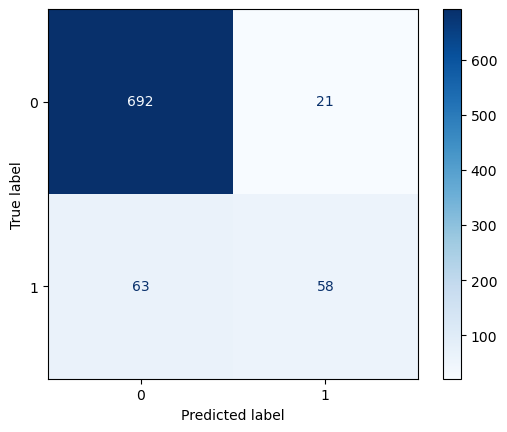

In [32]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues')

> I decided to leave it at this version of the model, as it performs best. while a k-neighbor of 9 has a test score that is the same as 5, 5 is marginally better as, in this situation, we are trying to reduce false negatives (someone who will churn, but we predict that they won't)